In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
index = ['Unitnumber','Cycles']
opset = ["Opset"+str(i) for i in range(1,4)]
sensor = ["Sensor"+str(i) for i in range(1,22)]
input_col = index + opset + sensor

In [3]:
df =  pd.read_csv('train_FD001.csv',delim_whitespace = True,names = input_col)

In [4]:
df.head()

,Unitnumber,Cycles,Opset1,Opset2,Opset3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


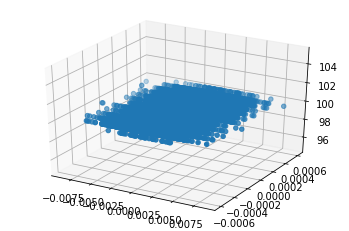

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.Opset1, df.Opset2, df.Opset3, cmap='Greens');


In [6]:
from sklearn.cluster import KMeans
sse=[]
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Opset1', 'Opset2']])
    sse.append(km.inertia_)

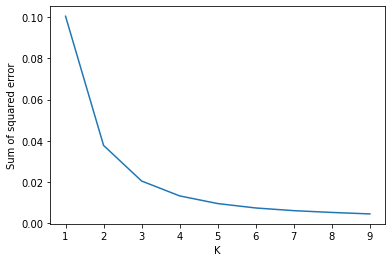

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Opset1', 'Opset2','Opset3']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
cen_z = [i[2] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4]})
df['cen_z'] = df.cluster.map({0:cen_z[0], 1:cen_z[1], 2:cen_z[2], 3:cen_x[3], 4:cen_x[4]})
# define and map colors
colors = ['#FF5733', '#FFD133', '#75FF33','#1A85DD','#E26FDE']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3], 4:colors[4]})

In [9]:
centroids


array([[-3.90880317e-03, -1.12265084e-05,  1.00000000e+02],
       [ 1.63634169e-03, -1.61559889e-06,  1.00000000e+02],
       [-8.77955272e-05,  8.37060703e-06,  1.00000000e+02],
       [ 3.77841016e-03,  1.04891816e-05,  1.00000000e+02],
       [-1.77230260e-03,  1.07482431e-06,  1.00000000e+02]])

In [10]:
#df['cen_x']

In [11]:
df.head()

,Unitnumber,Cycles,Opset1,Opset2,Opset3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,cluster,cen_x,cen_y,cen_z,c
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,2,-0.000088,0.000008,100.000000,#75FF33
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,1,0.001636,-0.000002,100.000000,#FFD133
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,0,-0.003909,-0.000011,100.000000,#FF5733
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,2,-0.000088,0.000008,100.000000,#75FF33
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,4,-0.001772,-0.001772,-0.001772,#E26FDE


In [12]:
#df.isna().sum()

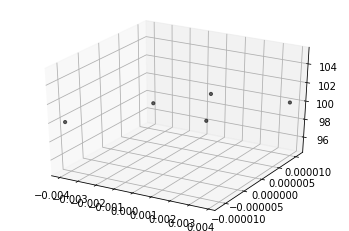

In [13]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')
#ax1.scatter3D(df.Opset1, df.Opset2, df.Opset3,c=df.c, alpha = 0.6, s=10);
ax1.scatter3D(centroids[:, 0], centroids[:, 1],centroids[:, 2], c='black', s=10, alpha=0.6);

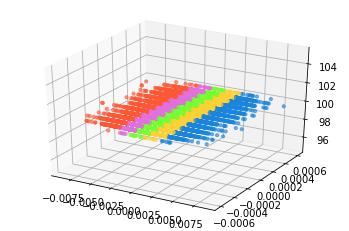

In [14]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df.Opset1, df.Opset2, df.Opset3,c=df.c, alpha = 0.6, s=10);

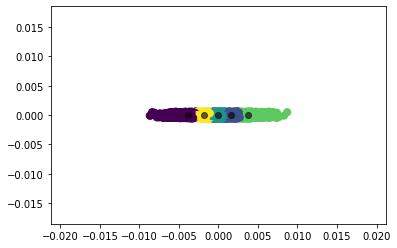

In [15]:
plt.scatter(df.Opset1, df.Opset2, c=df.cluster, s=50,cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.6);

In [16]:
df1 = df.drop(columns=df.columns[:5], axis=1)
df1

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,cluster,cen_x,cen_y,cen_z,c
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,392,2388,100.0,39.06,23.4190,2,-0.000088,0.000008,100.000000,#75FF33
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,392,2388,100.0,39.00,23.4236,1,0.001636,-0.000002,100.000000,#FFD133
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,390,2388,100.0,38.95,23.3442,0,-0.003909,-0.000011,100.000000,#FF5733
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,392,2388,100.0,38.88,23.3739,2,-0.000088,0.000008,100.000000,#75FF33
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,393,2388,100.0,38.90,23.4044,4,-0.001772,-0.001772,-0.001772,#E26FDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,...,397,2388,100.0,38.49,22.9735,2,-0.000088,0.000008,100.000000,#75FF33
20627,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,...,395,2388,100.0,38.30,23.1594,4,-0.001772,-0.001772,-0.001772,#E26FDE
20628,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,...,398,2388,100.0,38.44,22.9333,2,-0.000088,0.000008,100.000000,#75FF33
20629,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,...,395,2388,100.0,38.29,23.0640,4,-0.001772,-0.001772,-0.001772,#E26FDE


In [17]:
df1.drop(columns=df1.columns[-4:] , axis=1, inplace = True)
df1

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,cluster
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,2
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,2
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,4
20628,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,4


In [18]:
input = ["Sensor"+str(i)+"mean" for i in range(1,22)]
clus = ["cluster"]
df_mean = pd.DataFrame(df1.groupby('cluster').mean()).reset_index()
df_mean.columns = clus+input
df_mean

,cluster,Sensor1mean,Sensor2mean,Sensor3mean,Sensor4mean,Sensor5mean,Sensor6mean,Sensor7mean,Sensor8mean,Sensor9mean,...,Sensor12mean,Sensor13mean,Sensor14mean,Sensor15mean,Sensor16mean,Sensor17mean,Sensor18mean,Sensor19mean,Sensor20mean,Sensor21mean
0,0,518.67,642.662181,1590.553546,1408.748442,14.62,21.609807,553.380554,2388.095203,9065.605336,...,521.424026,2388.094594,8144.192488,8.441905,0.03,393.177547,2388.0,100.0,38.818591,23.294639
1,1,518.67,642.684054,1590.433627,1408.931383,14.62,21.609777,553.379032,2388.096546,9065.245942,...,521.417681,2388.096002,8143.830667,8.441709,0.03,393.212813,2388.0,100.0,38.816472,23.288944
2,2,518.67,642.680267,1590.465168,1408.869460,14.62,21.609802,553.375636,2388.095604,9065.058594,...,521.417791,2388.095452,8143.582450,8.442152,0.03,393.179393,2388.0,100.0,38.818534,23.290823
3,3,518.67,642.686834,1590.643401,1409.240673,14.62,21.609835,553.314882,2388.097437,9065.351515,...,521.403100,2388.096961,8143.756430,8.443458,0.03,393.241769,2388.0,100.0,38.810061,23.285554
4,4,518.67,642.683568,1590.632139,1408.962280,14.62,21.609818,553.362704,2388.098386,9065.278958,...,521.403338,2388.097522,8143.700858,8.442148,0.03,393.248863,2388.0,100.0,38.814878,23.288868


In [19]:
inputt = ["Sensor"+str(i)+"std" for i in range(1,22)]
clus = ["cluster"]
df_std = pd.DataFrame(df1.groupby('cluster').std()).reset_index()
df_std.columns = clus+inputt
df_std

,cluster,Sensor1std,Sensor2std,Sensor3std,Sensor4std,Sensor5std,Sensor6std,Sensor7std,Sensor8std,Sensor9std,...,Sensor12std,Sensor13std,Sensor14std,Sensor15std,Sensor16std,Sensor17std,Sensor18std,Sensor19std,Sensor20std,Sensor21std
0,0,0.0,0.493403,5.994600,8.896198,0.0,0.001376,0.880370,0.068577,22.307938,...,0.724610,0.070345,19.211149,0.036956,0.0,1.506256,0.0,0.0,0.178901,0.107822
1,1,0.0,0.499627,6.018003,8.985875,0.0,0.001476,0.887042,0.071657,22.231185,...,0.741000,0.071962,19.188718,0.037116,0.0,1.551620,0.0,0.0,0.182114,0.107106
2,2,0.0,0.494469,6.159695,8.995124,0.0,0.001394,0.888710,0.070621,21.992115,...,0.742730,0.071518,19.021313,0.037608,0.0,1.563153,0.0,0.0,0.180721,0.109017
3,3,0.0,0.512988,6.133389,8.816108,0.0,0.001273,0.884519,0.070442,21.903701,...,0.726361,0.071392,18.935998,0.038031,0.0,1.539707,0.0,0.0,0.179638,0.107275
4,4,0.0,0.504722,6.272641,9.146764,0.0,0.001336,0.879927,0.071916,22.025009,...,0.737368,0.073261,19.030672,0.037799,0.0,1.547829,0.0,0.0,0.180501,0.109075


In [20]:
df_merge  = df1.merge(df_mean, on=['cluster'], how='left')
df_merge

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor12mean,Sensor13mean,Sensor14mean,Sensor15mean,Sensor16mean,Sensor17mean,Sensor18mean,Sensor19mean,Sensor20mean,Sensor21mean
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,521.417791,2388.095452,8143.582450,8.442152,0.03,393.179393,2388.0,100.0,38.818534,23.290823
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,521.417681,2388.096002,8143.830667,8.441709,0.03,393.212813,2388.0,100.0,38.816472,23.288944
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,521.424026,2388.094594,8144.192488,8.441905,0.03,393.177547,2388.0,100.0,38.818591,23.294639
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,521.417791,2388.095452,8143.582450,8.442152,0.03,393.179393,2388.0,100.0,38.818534,23.290823
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,521.403338,2388.097522,8143.700858,8.442148,0.03,393.248863,2388.0,100.0,38.814878,23.288868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,...,521.417791,2388.095452,8143.582450,8.442152,0.03,393.179393,2388.0,100.0,38.818534,23.290823
20627,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,...,521.403338,2388.097522,8143.700858,8.442148,0.03,393.248863,2388.0,100.0,38.814878,23.288868
20628,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,...,521.417791,2388.095452,8143.582450,8.442152,0.03,393.179393,2388.0,100.0,38.818534,23.290823
20629,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,...,521.403338,2388.097522,8143.700858,8.442148,0.03,393.248863,2388.0,100.0,38.814878,23.288868


In [21]:
df_merge.columns

Index(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6',
       'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12',
       'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18',
       'Sensor19', 'Sensor20', 'Sensor21', 'cluster', 'Sensor1mean',
       'Sensor2mean', 'Sensor3mean', 'Sensor4mean', 'Sensor5mean',
       'Sensor6mean', 'Sensor7mean', 'Sensor8mean', 'Sensor9mean',
       'Sensor10mean', 'Sensor11mean', 'Sensor12mean', 'Sensor13mean',
       'Sensor14mean', 'Sensor15mean', 'Sensor16mean', 'Sensor17mean',
       'Sensor18mean', 'Sensor19mean', 'Sensor20mean', 'Sensor21mean'],
      dtype='object')

In [22]:
df_merge_final  = df_merge.merge(df_std, on=['cluster'], how='left')

In [23]:
df_merge_final

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,...,Sensor12std,Sensor13std,Sensor14std,Sensor15std,Sensor16std,Sensor17std,Sensor18std,Sensor19std,Sensor20std,Sensor21std
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,0.742730,0.071518,19.021313,0.037608,0.0,1.563153,0.0,0.0,0.180721,0.109017
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,0.741000,0.071962,19.188718,0.037116,0.0,1.551620,0.0,0.0,0.182114,0.107106
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,0.724610,0.070345,19.211149,0.036956,0.0,1.506256,0.0,0.0,0.178901,0.107822
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,0.742730,0.071518,19.021313,0.037608,0.0,1.563153,0.0,0.0,0.180721,0.109017
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,0.737368,0.073261,19.030672,0.037799,0.0,1.547829,0.0,0.0,0.180501,0.109075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,...,0.742730,0.071518,19.021313,0.037608,0.0,1.563153,0.0,0.0,0.180721,0.109017
20627,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,...,0.737368,0.073261,19.030672,0.037799,0.0,1.547829,0.0,0.0,0.180501,0.109075
20628,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,...,0.742730,0.071518,19.021313,0.037608,0.0,1.563153,0.0,0.0,0.180721,0.109017
20629,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,...,0.737368,0.073261,19.030672,0.037799,0.0,1.547829,0.0,0.0,0.180501,0.109075


In [24]:
df_sensor = df_merge_final[ df_merge_final.columns[0:21]]
df_meann = df_merge_final[ df_merge_final.columns[22:43]]
df_stdd = df_merge_final[ df_merge_final.columns[43:]]


In [25]:
df_z = (df_sensor.subtract(df_meann.values))/df_stdd.values

In [26]:
df_z = df_z.replace([np.inf, -np.inf], np.nan)
df_z=df_z.fillna(0)

In [27]:
df_start=df[df.columns[0:5]]
df_start

,Unitnumber,Cycles,Opset1,Opset2,Opset3
0,1,1,-0.0007,-0.0004,100.0
1,1,2,0.0019,-0.0003,100.0
2,1,3,-0.0043,0.0003,100.0
3,1,4,0.0007,0.0000,100.0
4,1,5,-0.0019,-0.0002,100.0
...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0
20627,100,197,-0.0016,-0.0005,100.0
20628,100,198,0.0004,0.0000,100.0
20629,100,199,-0.0011,0.0003,100.0


In [28]:
final=pd.concat([df_start,df_z],axis=1)
final.head()

,Unitnumber,Cycles,Opset1,Opset2,Opset3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.739781,-0.124222,-0.919327,0.0,...,0.326107,-1.055009,-0.260889,-0.602326,0.0,-0.754496,0.0,0.0,1.336125,1.175757
1,1,2,0.0019,-0.0003,100.0,0.0,-1.068905,0.230371,-0.644499,0.0,...,1.163723,-0.361330,-0.643121,-0.266962,0.0,-0.781643,0.0,0.0,1.007765,1.257217
2,1,3,-0.0043,0.0003,100.0,0.0,-0.632711,-0.427643,-0.511279,0.0,...,1.374498,-0.918259,-0.570632,-0.652248,0.0,-2.109566,0.0,0.0,0.734538,0.459656
3,1,4,0.0007,0.0000,100.0,0.0,-0.667923,-1.246030,-0.778139,0.0,...,1.941768,-0.216059,-0.512712,-1.966406,0.0,-0.754496,0.0,0.0,0.340117,0.762059
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621268,-1.240648,-0.299809,0.0,...,1.066851,-0.785165,-0.520258,-0.337249,0.0,-0.160782,0.0,0.0,0.471588,1.059190


In [29]:
rul_df=pd.DataFrame(final.groupby('Unitnumber')['Cycles'].max()).reset_index()
rul_df.columns=['Unitnumber','max_cycle']
final_1=final.merge(rul_df,on=['Unitnumber'],how='left')

final_1['RUL']=final_1['max_cycle']-final_1['Cycles']

rul1_df=pd.DataFrame(final_1.groupby('Unitnumber')['RUL'].max()).reset_index()
rul1_df.columns=['Unitnumber','RUL_max']
final_1=final_1.merge(rul1_df,on=['Unitnumber'],how='left')

final_1['health']=final_1['RUL']/final_1['RUL_max']

#final_1.drop('max_cycle',axis=1,inplace=True)
final_1

,Unitnumber,Cycles,Opset1,Opset2,Opset3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,max_cycle,RUL,RUL_max,health
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.739781,-0.124222,-0.919327,0.0,...,0.0,-0.754496,0.0,0.0,1.336125,1.175757,192,191,191,1.000000
1,1,2,0.0019,-0.0003,100.0,0.0,-1.068905,0.230371,-0.644499,0.0,...,0.0,-0.781643,0.0,0.0,1.007765,1.257217,192,190,191,0.994764
2,1,3,-0.0043,0.0003,100.0,0.0,-0.632711,-0.427643,-0.511279,0.0,...,0.0,-2.109566,0.0,0.0,0.734538,0.459656,192,189,191,0.989529
3,1,4,0.0007,0.0000,100.0,0.0,-0.667923,-1.246030,-0.778139,0.0,...,0.0,-0.754496,0.0,0.0,0.340117,0.762059,192,188,191,0.984293
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621268,-1.240648,-0.299809,0.0,...,0.0,-0.160782,0.0,0.0,0.471588,1.059190,192,187,191,0.979058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,0.0,1.637583,1.220001,2.196806,0.0,...,0.0,2.444167,0.0,0.0,-1.817901,-2.910776,200,4,199,0.020101
20627,100,197,-0.0016,-0.0005,100.0,0.0,1.696839,2.210849,2.691413,0.0,...,0.0,1.131350,0.0,0.0,-2.852499,-1.186963,200,3,199,0.015075
20628,100,198,0.0004,0.0000,100.0,0.0,1.496017,1.947309,2.146779,0.0,...,0.0,3.083899,0.0,0.0,-2.094570,-3.279528,200,2,199,0.010050
20629,100,199,-0.0011,0.0003,100.0,0.0,1.082640,2.332010,1.920649,0.0,...,0.0,1.131350,0.0,0.0,-2.907900,-2.061587,200,1,199,0.005025


In [30]:
final_1.health.max()

1.0

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [32]:
for i in range(21):
    tmp=np.array(final_1[final.columns[5+i]])
    tmp=tmp.reshape(-1,1)
    reg.fit(tmp,final_1.RUL)
    print(i+1,abs(reg.coef_))
    #print(reg.coef_)

1 [0.]
2 [41.77597684]
3 [40.25333162]
4 [46.75975973]
5 [0.]
6 [8.82964796]
7 [45.25318505]
8 [38.83359291]
9 [26.86696657]
10 [0.]
11 [47.94457217]
12 [46.2782524]
13 [38.73643896]
14 [21.13037627]
15 [44.26348906]
16 [0.]
17 [41.73777834]
18 [0.]
19 [0.]
20 [43.34079526]
21 [43.77851183]


2 3 4 7 11 12 15 17 20 21

In [33]:
import random

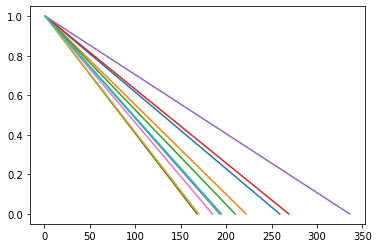

In [34]:
for i in range(10):
    rand=random.randint(0,100)
    temp=final_1[final_1.Unitnumber==rand]
    plt.plot(temp.Cycles,temp.health)

In [35]:
train_x=final_1[['Sensor2','Sensor3','Sensor4','Sensor7','Sensor11','Sensor12','Sensor15','Sensor17','Sensor20','Sensor21']]
train_y=final_1.health

In [36]:
features=['Sensor2','Sensor3','Sensor4','Sensor7','Sensor11','Sensor12','Sensor15','Sensor17','Sensor20','Sensor21']

In [37]:
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
weight=reg.coef_
weight

array([-0.01758734, -0.02603773, -0.03910268,  0.01202734, -0.04127645,
        0.01421535, -0.02667214, -0.02983185,  0.02629227,  0.02780143])

In [39]:
reg.intercept_

0.5000000000000034

In [40]:
#train_x
reg.score(train_x,train_y)

0.6072218610340582

In [41]:
dot_prod=np.dot(train_x,weight)
dot_prod[:10]

array([0.20475815, 0.15918811, 0.22747809, 0.28520006, 0.17486816,
       0.28112494, 0.22481723, 0.23794802, 0.26609684, 0.23376115])

In [42]:
fused=pd.Series(dot_prod)

In [43]:
#mov_fused = mov_fused + 1 - mov_fused[0]
mov_fused=fused.rolling(10).mean()

In [44]:
df_fused=pd.DataFrame(fused,columns=['fused'])
df_fused.isna().sum()

fused    0
dtype: int64

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
dataFused = moving_average(dot_prod,10)
dataFused[0:10]

dataFused = dataFused + 1 - dataFused[0]
dataFused[0:10]

dataFused.shape

In [45]:
df_hi_fused=pd.concat([final_1, df_fused], axis=1, join='inner')
df_hi_fused=df_hi_fused[['Unitnumber','Cycles','health','fused']]
df_hi_fused

,Unitnumber,Cycles,health,fused
0,1,1,1.000000,0.204758
1,1,2,0.994764,0.159188
2,1,3,0.989529,0.227478
3,1,4,0.984293,0.285200
4,1,5,0.979058,0.174868
...,...,...,...,...
20626,100,196,0.020101,-0.531652
20627,100,197,0.015075,-0.528645
20628,100,198,0.010050,-0.631470
20629,100,199,0.005025,-0.590615


In [46]:
#df_hi_fused.groupby('Unitnumber')['fused'].rolling(10).mean().isna().sum

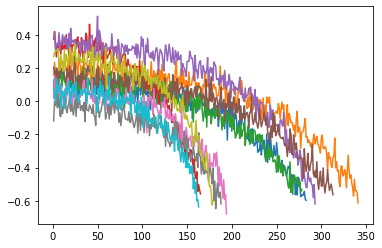

In [47]:
for i in range(10):
    rand=random.randint(0,100)
    temp=df_hi_fused[df_hi_fused.Unitnumber==rand]
    #print(temp)
    plt.plot(temp.Cycles,temp.fused)

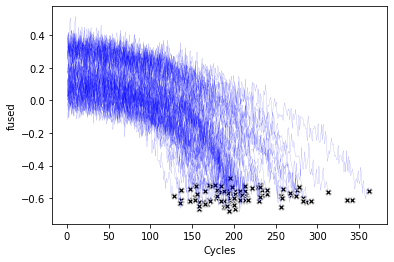

In [48]:
for i in range(0,75):
    sns.lineplot(data=df_hi_fused[df_hi_fused.Unitnumber==i],x='Cycles',y='fused',color='blue',lw=0.1)
    sns.scatterplot(data=df_hi_fused[df_hi_fused.health==0],x='Cycles',y='fused',color='black',marker='X')

In [49]:
df_hi_mov=df_hi_fused.groupby('Unitnumber')['fused'].rolling(window=5).mean()
df_hi_mov=pd.DataFrame(df_hi_mov).reset_index()
#df_hi_mov=df_hi_mov.reset_index()
df_hi_mov.dropna(inplace=True)
df_hi_mov.drop(['level_1'],axis=1,inplace=True)
df_hi_mov['Cycles']=df_hi_mov.groupby('Unitnumber').cumcount()+1
df_hi_mov

,Unitnumber,fused,Cycles
4,1,0.210299,1
5,1,0.225572,2
6,1,0.238698,3
7,1,0.240792,4
8,1,0.236971,5
...,...,...,...
20626,100,-0.510781,192
20627,100,-0.523340,193
20628,100,-0.539948,194
20629,100,-0.566219,195


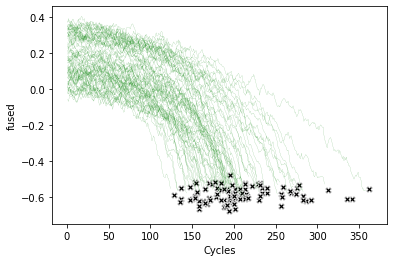

In [50]:
for i in range(0,75):
    sns.lineplot(data=df_hi_mov[df_hi_mov.Unitnumber==i],x='Cycles',y='fused',color='green',lw=0.1)
    sns.scatterplot(data=df_hi_fused[df_hi_fused.health==0],x='Cycles',y='fused',color='black',marker='X')

second order polynoial

In [51]:
df_params=pd.DataFrame(columns=['Unitnumber','theta2','theta1','theta0'])

In [52]:
for i in range(1,101):
    y=df_hi_mov.fused[df_hi_mov.Unitnumber==i]
    cycle=df_hi_mov.Cycles[df_hi_mov.Unitnumber==i]
    
    theta2,theta1,theta0 = np.polyfit(cycle,y,2)
    
    df_params=df_params.append({'Unitnumber':i,'theta2':theta2,'theta1':theta1,'theta0':theta0},ignore_index=True)

In [53]:
df_params

,Unitnumber,theta2,theta1,theta0
0,1.0,-0.000030,0.002380,0.178958
1,2.0,-0.000016,0.001948,0.294793
2,3.0,-0.000037,0.003178,0.204345
3,4.0,-0.000033,0.003370,0.084913
4,5.0,-0.000018,0.002058,0.276855
...,...,...,...,...
95,96.0,-0.000010,0.001199,0.181780
96,97.0,-0.000031,0.003671,0.136487
97,98.0,-0.000045,0.002236,0.259320
98,99.0,-0.000033,0.002408,0.187396


Text(0, 0.5, 'health')

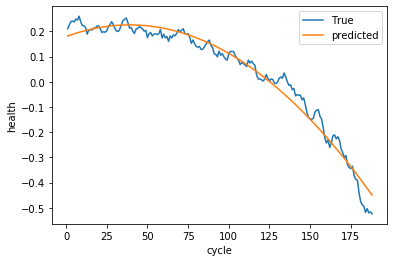

In [54]:
true_hi=df_hi_mov.fused[df_hi_mov.Unitnumber==1]
cycle=df_hi_mov.Cycles[df_hi_mov.Unitnumber==1]

t0=df_params.theta0[df_params.Unitnumber==1].values
t1=df_params.theta1[df_params.Unitnumber==1].values
t2=df_params.theta2[df_params.Unitnumber==1].values

predicted_hi=t0+t1*cycle+t2*cycle*cycle

plt.plot(cycle,true_hi,label='True')
plt.plot(cycle,predicted_hi,label='predicted')
plt.legend()
plt.xlabel('cycle')
plt.ylabel('health')

testing data

In [55]:
df_test =  pd.read_csv('test_FD001.txt',delim_whitespace = True,names = input_col)

In [56]:
df_test.head()

,Unitnumber,Cycles,Opset1,Opset2,Opset3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [57]:
df_test.shape

(13096, 26)

In [71]:
weight

array([-0.01758734, -0.02603773, -0.03910268,  0.01202734, -0.04127645,
        0.01421535, -0.02667214, -0.02983185,  0.02629227,  0.02780143])

In [72]:
df_test['health']=np.dot(df_test[features],weight)
df_test['health']

0       -105.376727
1       -105.346030
2       -105.562421
3       -105.629307
4       -105.493364
            ...    
13091   -106.549325
13092   -106.718485
13093   -106.060602
13094   -106.588769
13095   -107.029977
Name: health, Length: 13096, dtype: float64

In [74]:
df_test['health']=df_test[features].dot(weight)
df_test['health']

0       -105.376727
1       -105.346030
2       -105.562421
3       -105.629307
4       -105.493364
            ...    
13091   -106.549325
13092   -106.718485
13093   -106.060602
13094   -106.588769
13095   -107.029977
Name: health, Length: 13096, dtype: float64